# Выявление определяющей успешность игры закономерности.

В нашем распоряжении данные из интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

                                Описание данных: 
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Открытие файла с данными и изучение общей информации

In [1]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

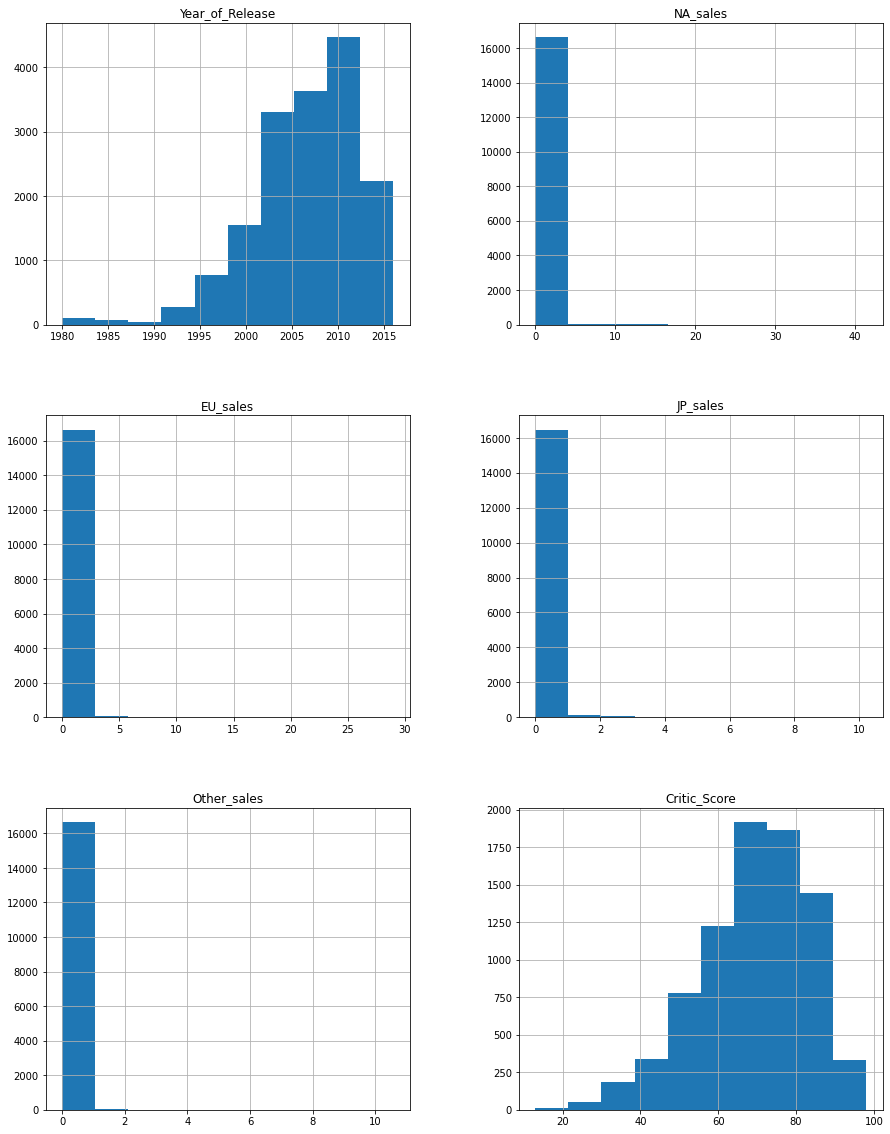

In [5]:
df.hist(figsize=(15, 20))

In [6]:
df.duplicated().sum()

0

## Подготовка данных

### Замена названия столбцов (приведите к нижнему регистру)

In [7]:
df.columns = df.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

### Преобразование данных в нужные типы.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#df['year_of_release'] = df['year_of_release'].astype('int') 

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбце год выпуска - year_of_release изменим на тп данных int после того как удалим там пропуски.  
В столбце оценка пользователей user_score изменила тип данных на вещественные числа, значение tbd, встречавшееся в этом столбце, сочла за пропуски и заменил на NaN. Так как обычно пользователи ставят tbd, когда еще не оценили игру, и оценка в процессе, значит ее просто нет. 
Столбец rating это рейтинг фильма по возрасту: «EC», «E», «E10+», «T», «M», «AO», «RP». Встречается KA - это игры для детей и взрослых: Игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E. Поэтому мы тоже переименуем его в «E».

### Обработайте пропуски

In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [17]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

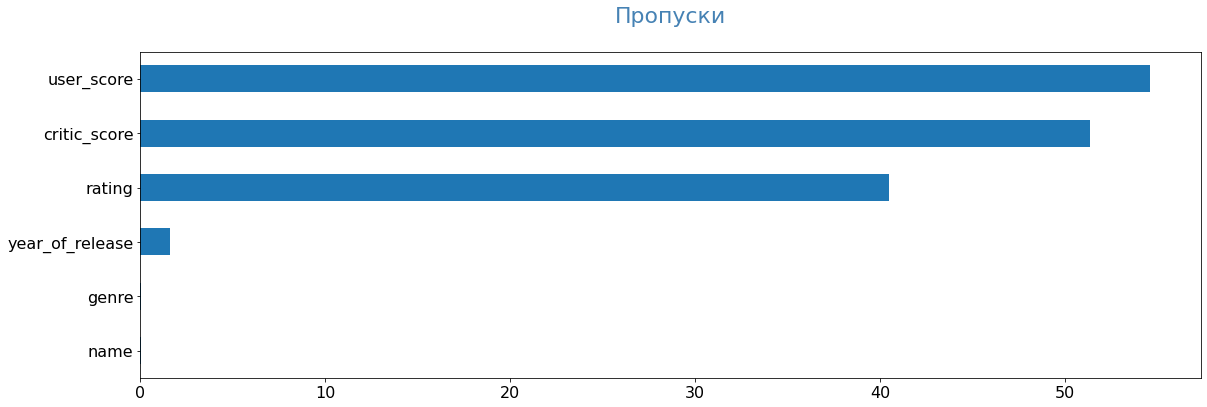

In [18]:
pass_value_barh(df)

In [19]:
df['rating'] = df['rating'].fillna('No')
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
df['year_of_release'] = df['year_of_release'].astype('int') #изменили тип на целое число лет.
df['critic_score'] = df['critic_score'].fillna(-1)#заменила все пропуски на -1
df['user_score'] = df['user_score'].fillna(-1)#заменила все пропуски на -1


In [20]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [22]:
percentage_removed = 16444 * 100 / 16715
percentage_removed

98.37870176488184

Пропуски были обнаружены в 6 столбцах. В name, year_of_release, genre строчки с пропусками удалены, так как их всего 273, это меньше 1% от всего колличества данных. 
В столбцах critic_score, user_score пропуски были заменены на медианное значение. Сначала записано медианное значение сгрупированных данных по платформе, году и жанру, но таким способом ушли не все пропуски. Оказалось что на некоторых отдельных платформах (например '2600') отсутствуют вообще значения в critic_score и user_score. Поэтому такие пропуски были заменены на меданное значние просто по жанрам. Процент потери данных 2%, что допустимо. 

In [23]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


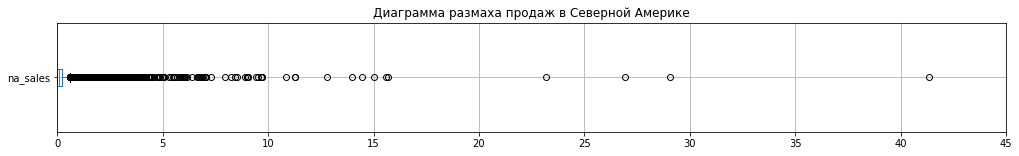

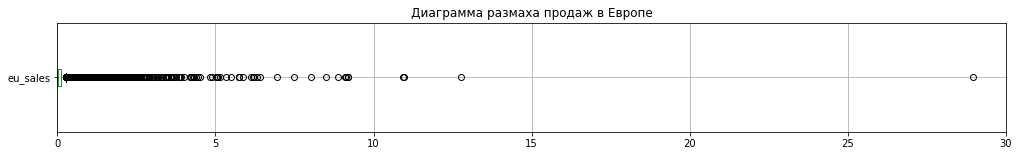

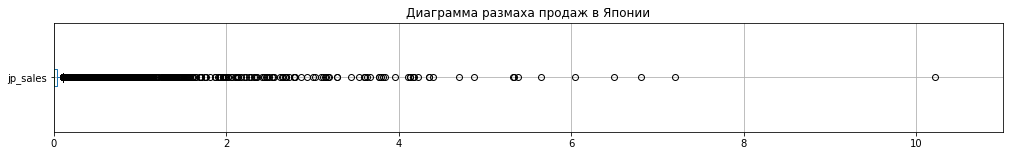

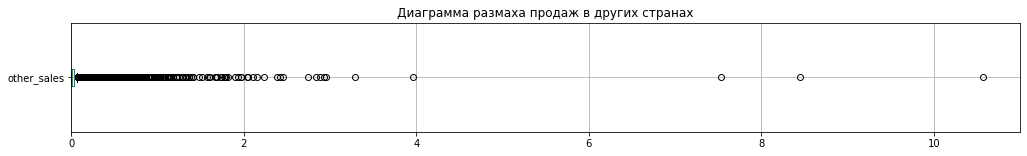

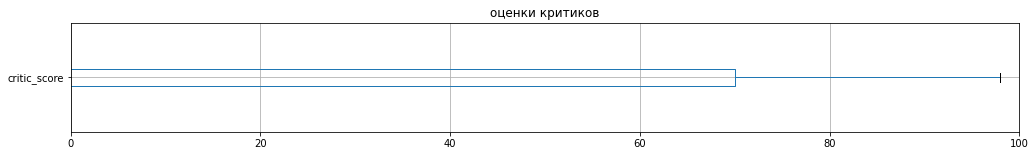

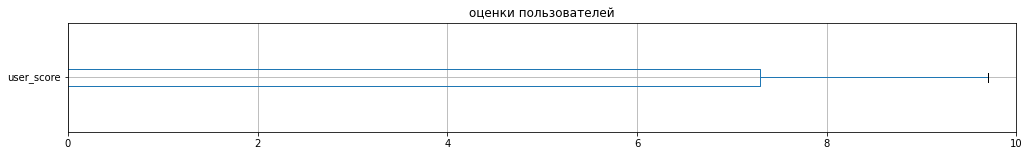

In [24]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['na_sales']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж в Северной Америке')
ax.set_xlim(0, 45)
plt.show()
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['eu_sales']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж в Европе')
ax.set_xlim(0, 30);
plt.show()
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['jp_sales']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж в Японии')
ax.set_xlim(0, 11);
plt.show()
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['other_sales']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха продаж в других странах')
ax.set_xlim(0, 11);
plt.show()
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['critic_score']].boxplot(vert = False, ax =ax)
ax.set_title('оценки критиков')
ax.set_xlim(0, 100);
plt.show()
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['user_score']].boxplot(vert = False, ax =ax)
ax.set_title('оценки пользователей')
ax.set_xlim(0, 10);
plt.show()

### Cуммарные продажи во всех регионах

In [25]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No,31.38


In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Проведение исследовательского анализа данных

### Cколько игр выпускалось в разные годы. 

<AxesSubplot:xlabel='year_of_release'>

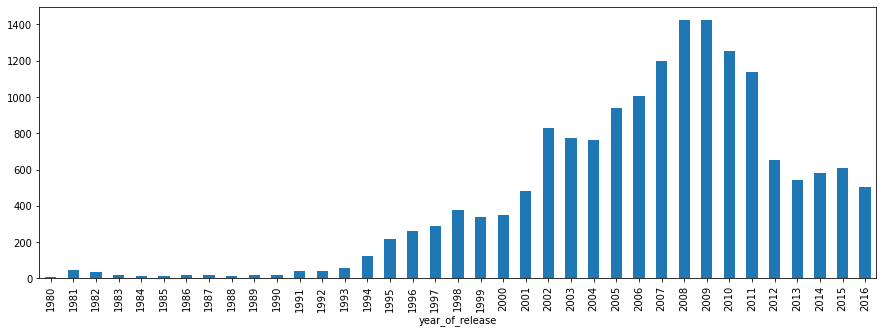

In [28]:
df.groupby('year_of_release')['name'].count().plot.bar(figsize=(15, 5))

###  Изменяемость продаж по платформам

<AxesSubplot:xlabel='platform'>

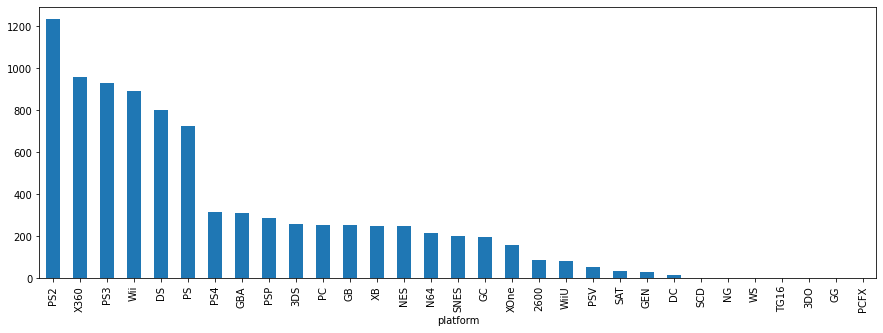

In [29]:
sales_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
sales_platform.plot.bar(figsize=(15, 5))

In [30]:
sales_platform_top6 = sales_platform[0:6]
sales_platform_top6

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: all_sales, dtype: float64

platform             DS      PS     PS2     PS3     Wii    X360
year_of_release                                                
1985               0.02     NaN     NaN     NaN     NaN     NaN
1994                NaN    6.03     NaN     NaN     NaN     NaN
1995                NaN   35.96     NaN     NaN     NaN     NaN
1996                NaN   94.70     NaN     NaN     NaN     NaN
1997                NaN  136.17     NaN     NaN     NaN     NaN
1998                NaN  169.49     NaN     NaN     NaN     NaN
1999                NaN  144.53     NaN     NaN     NaN     NaN
2000                NaN   96.37   39.17     NaN     NaN     NaN
2001                NaN   35.59  166.43     NaN     NaN     NaN
2002                NaN    6.67  205.38     NaN     NaN     NaN
2003                NaN    2.07  184.31     NaN     NaN     NaN
2004              17.27     NaN  211.81     NaN     NaN     NaN
2005             130.14     NaN  160.66     NaN     NaN    8.25
2006             119.81     NaN  103.42 

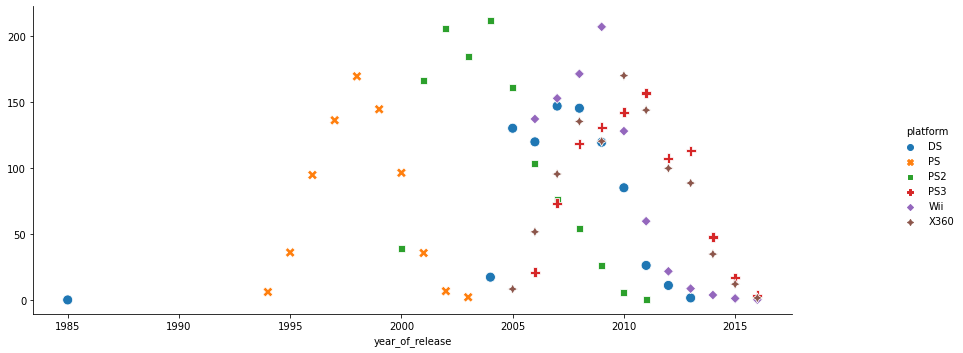

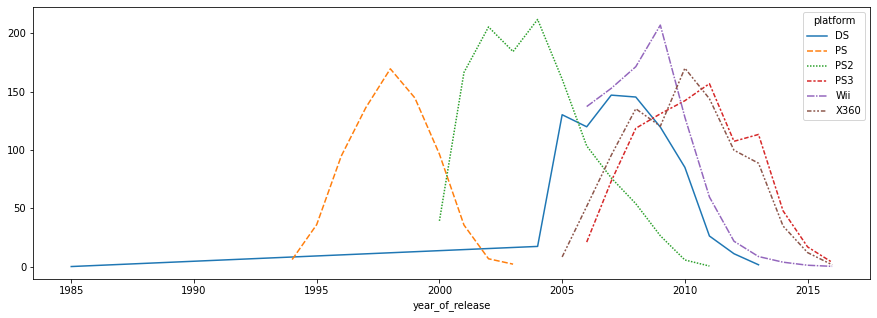

In [31]:
df_platform_top6 = df.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PS"')
platform_top6_groupby = df_platform_top6.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
print(platform_top6_groupby)

sns.relplot(data=platform_top6_groupby, s=100)
plt.gcf().set_size_inches(15,5)
plt.show()

sns.lineplot(data=platform_top6_groupby)
plt.gcf().set_size_inches(15,5)
plt.show()

In [32]:
df_platform_top6.loc[df_platform_top6['year_of_release'] == 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,No,0.02


За какой характерный срок появляются новые и исчезают старые платформы?
Построено распределение по годам для 6 платформ, оторые приносли больше вего прибыли. Можно сказать что появление и исчезновение новых платформ происходит каждые 10 лет. Т.е. в основном платформы продают свои игры в течении 10 лет,  потом пропадают с рынка. Игры общем продаются каждый год. Платформа DS достаточно странная, год выпуска для игры 
Strongest Tokyo University Shogi указан не правильно, в этот од платформы еще не существовало, поэтому такой странный граффик.

###  Актуальный период

In [33]:
df_actual = df.query('year_of_release >= 2013')
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Актуальный период - это период с 2013 года по настоящий(в таблице). Период был выбран так, потому что если мы посмотрим на график линейной зависимости продаж от года, то увидем что с 2013 динамика не изменялась, только понижалась. 

### Платформы лидирующие по продажам, растущие или падающие 

Рассмотрим какие платформы лидируют по продажам, растут или падают в актуальный период времени. Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='platform'>

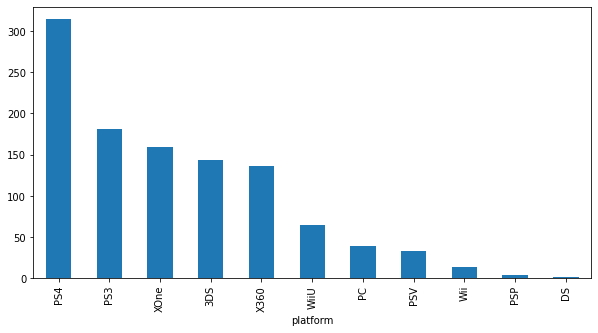

In [34]:
df_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10, 5))

Топ 5 лидеров по прадажам: PS4, PS3, XOne, 3DS, X360 за 2013-2016 год. 

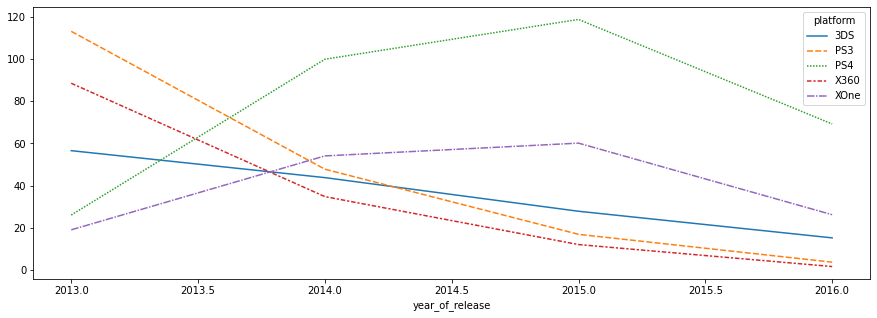

In [35]:
columns = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
df_actual_top5 = df_actual.query('@columns in platform').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='all_sales', 
    aggfunc='sum'
)

sns.lineplot(data=df_actual_top5)
plt.gcf().set_size_inches(15,5)

Платформы лидирующие по продажам это PS4, PS3, XOne, 3DS, X360. Из них до 2015г только две имеют рост продаж:PS4, XOne. Остальные платформы за последнии года имеют спад в продажах. Потенциально прибыльные платформы: PS4, XOne, их игры приносят больше всего прибыли с 2014г. 
Самый сильный спад у 3DS.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Отнесем к глобальным продажам игры которые за последнии годы имеют большие продажи: PS4, XOne, 3DS.

Text(0.5, 1.0, 'Диаграмма размаха')

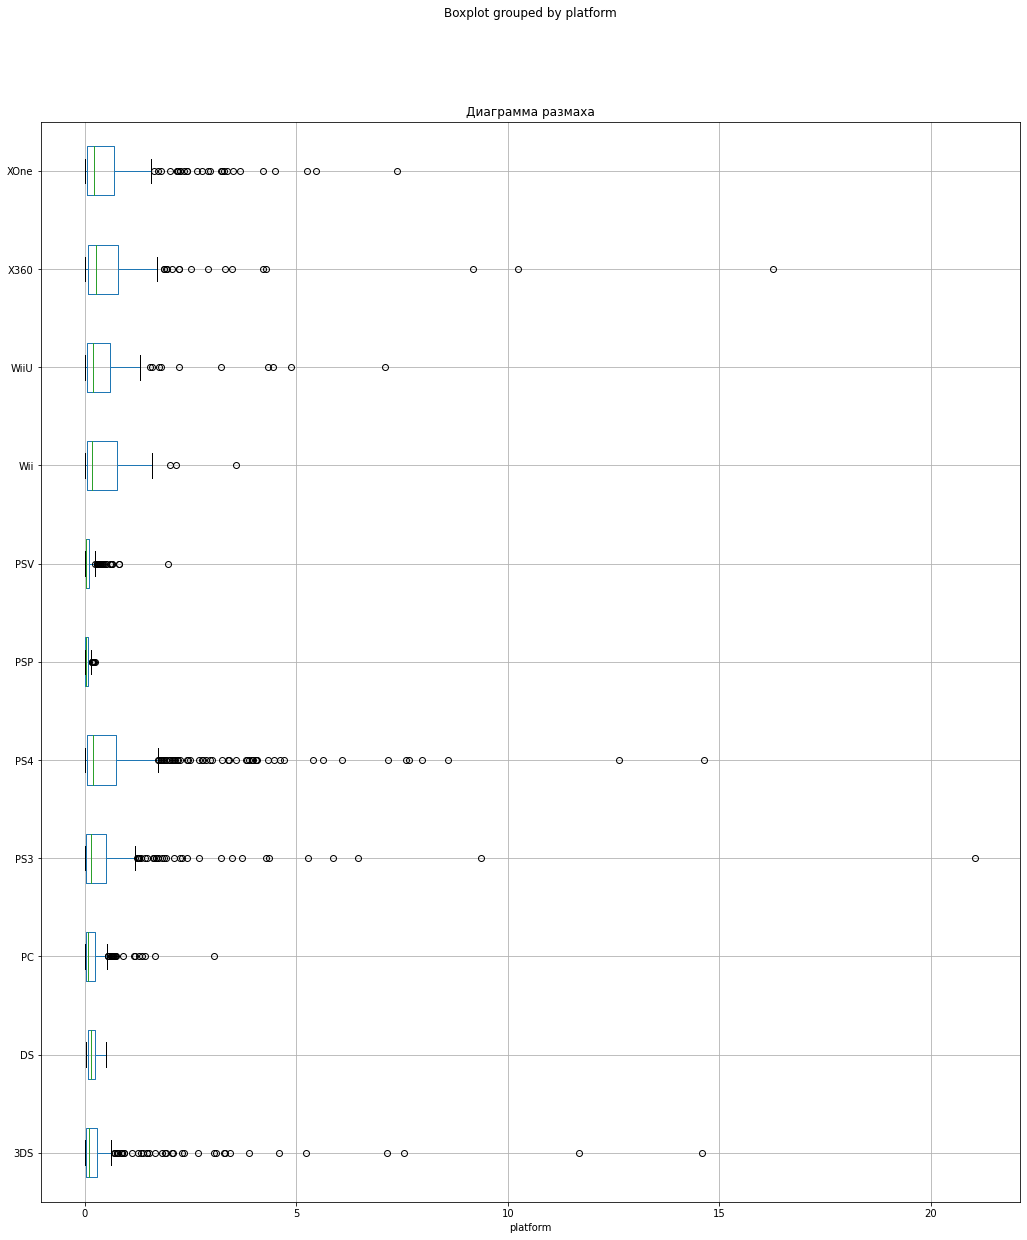

In [36]:
fig, ax = plt.subplots(figsize = (17,20))
ax = df_actual.boxplot(column='all_sales', by='platform',vert = False, ax =ax)
ax.set_title('Диаграмма размаха')

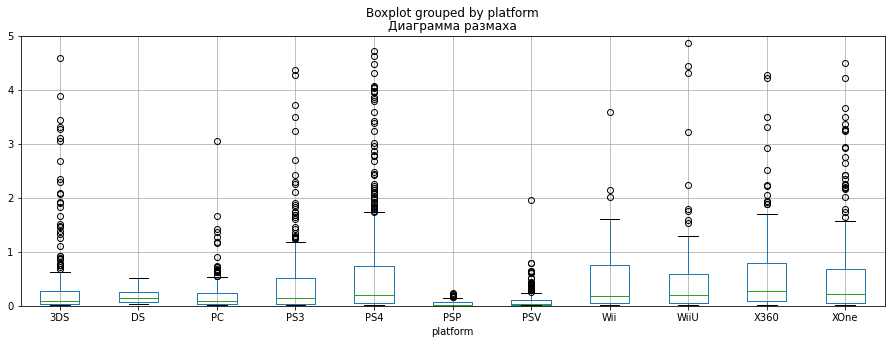

In [37]:
fig, ax = plt.subplots(figsize = (15,5))
ax = df_actual.boxplot(column='all_sales', by='platform',vert = True, ax =ax)
ax.set_title('Диаграмма размаха')
ax.set_ylim(0, 5);

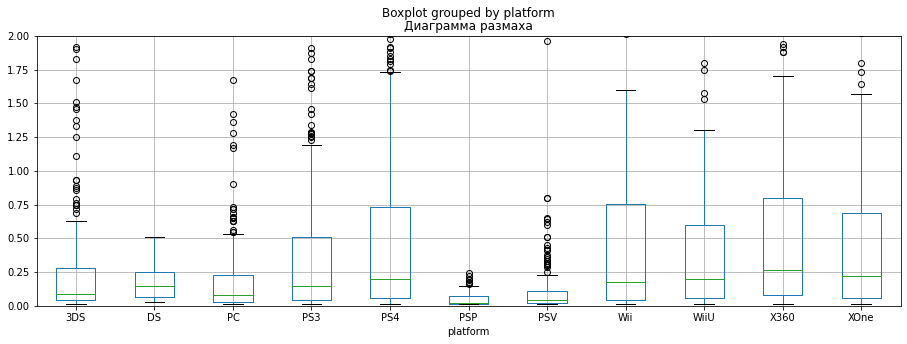

In [38]:
fig, ax = plt.subplots(figsize = (15,5))
ax = df_actual.boxplot(column='all_sales', by='platform',vert = True, ax =ax)
ax.set_title('Диаграмма размаха')
ax.set_ylim(0, 2);

In [39]:
df_actual[(df_actual['all_sales'] > 12) & (df_actual['platform'] == 'PS4')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [40]:
df_actual[(df_actual['all_sales'] > 7) & (df_actual['platform'] == 'XOne')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,No,7.39


In [41]:
df_actual[(df_actual['all_sales'] > 10) & (df_actual['platform'] == '3DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,No,11.68


Если сравнивать продажи по всем платформам после 2013г то видно, что есть игра которая опередила наши выделенные гглобальные платформы по продажам - это PS3 с продажей больше 20мил. Если смотреть в общем на картину, хоть и есть большие продажи, много выбросов (даже в некоторых случаях частых), все равно медианное значение достаточно низкое у всех не привышает 300тыс. Очень много выбрасов и побольше сами усы у PS3, PS4, XOne. Видимо они выпускали больше всего игр, и их игры больше всего покупали, что логично это 2 самые крупные компании, производящие игры по нынешнее время. Платформа 3DS видно что пытается быть на их уровне но пока не дотягивает.

По грфикам boxplot видно что у трех глобальных платформах исть игры которые имеют больше всего продаж, т.е игры в которые играли почти все игроманы - самые популярные. Если посмотреть что это за игры, то для двух конкурирующих платформ PS4, XOne самымой прибыльной оказалась игра Call of Duty, ну это и не удивительно, кто не слышал и не играл в эту игру...(?).
Для платформы 3DS самой прибольной оказалась игра Pokemon в разных ее версиях, стабильность тоже не плохо, но кроме Pokemon все остальные игры продавались на уровне остальных игр. 



### Влияние на продажи PS4 отзывов пользователей и критиков. 

In [42]:
df_actual_с = df_actual[df_actual['critic_score'] != -1]
df_actual_u = df_actual[df_actual['user_score'] != -1]
df_actual_all = df_actual_с[df_actual_с['user_score'] != -1]

In [43]:
# Комментарий р
#print(len(df_actual[df_actual['critic_score'] != -1]))
#print(len(df_actual[df_actual['user_score'] != -1]))
#print(len(df_actual_1))

In [44]:
def relplot_score(table,table2, x1, x2, t):
    t1 = sns.relplot(data=table, x='critic_score', y='all_sales', kind='scatter', alpha=0.6, s=50)
    plt.xlabel(x1)
    plt.ylabel('все продажи(мил.)')
    t1.fig.suptitle(t, fontsize=16)
    plt.show()
    
    sns.relplot(data=table2, x='user_score', y='all_sales', kind='scatter', alpha=0.6, s=50)
    plt.xlabel(x2)
    plt.ylabel('все продажи(мил.)')
    plt.show()

In [45]:
def relplot_score_2(table, name):
    sns.relplot(
    data=table, 
    x='critic_score', 
    y='all_sales', 
    kind='scatter',
    col='year_of_release', 
    hue='user_score', 
    s=100, 
    col_wrap=2).fig.suptitle(name, fontsize=16)

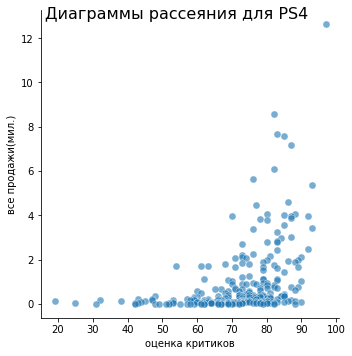

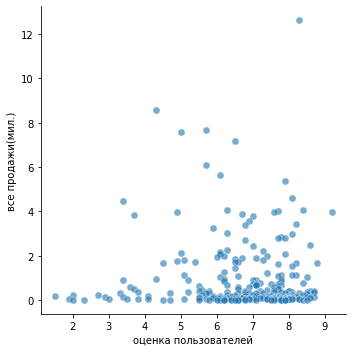

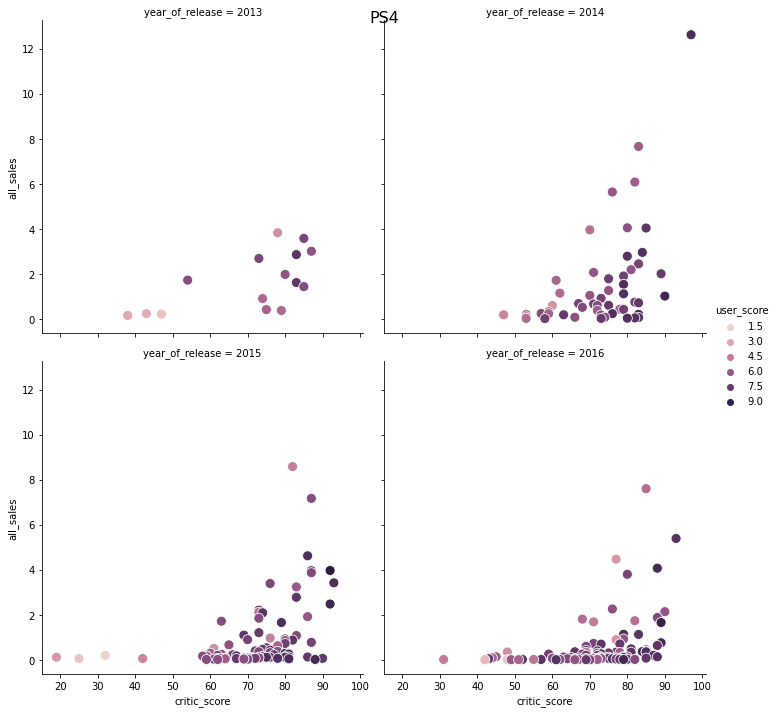

In [46]:
#column = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
#for column in column:
relplot_score(
        df_actual_с[df_actual_с['platform'] == 'PS4'], 
        df_actual_u[df_actual_u['platform'] == 'PS4'],
        'оценка критиков', 
        'оценка пользователей', 
        'Диаграммы рассеяния для PS4')

relplot_score_2(
    df_actual_all[df_actual_all['platform'] == 'PS4'], 
    'PS4')


In [47]:
def corr_score_sales(table, table1, name):
    g1 = table['critic_score'].corr(table['all_sales'])
    g2 = table1['user_score'].corr(table1['all_sales'])
    print(f'Корреляция между отзывами критиков и продажами для {name}: {g1}')
    print(f'Корреляция между отзывами пользователей и продажами для {name}: {g2}')

In [48]:
corr_score_sales(df_actual_с[df_actual_с['platform'] == 'PS4'], df_actual_u[df_actual_u['platform'] == 'PS4'], 'PS4')

Корреляция между отзывами критиков и продажами для PS4: 0.40656790206178095
Корреляция между отзывами пользователей и продажами для PS4: -0.031957110204556376


Корреляия между отзывами критиков и продажами для PS4 положительная но чень маленькая, значит с ростом отзывов растут цены но линейная зависимость очень очень слабая. Корреляия между отзывами пользователей и продажами для PS4 отрицательная, значит с ростом отзывов продажи как будто падают, но так как линейная зависимость близка к нулю можно сказать, что зависимость почти отсутствует. 
По диаграмме рассеяния можно увидеть что для любых отзывов чем они выше тем было больше появлялось игр, но в основном продажи на уровне 2мил. Игры которые продавались больше 2мил. это игры которые вистерлили лучше всех, для них почти всегда оценка критиков и пользователей была высокая. Если смотреть по годам то достаточно много игр продавалось в 2015 и 2016 годах, но игры которые стали трендовыми в основном вышли в 2014 и 2015г. Видимо игры которые вышли в 2016г еще не не успели набрать оборот. Хочу заметить что самые популярные игры имеют самую высокую оценку пользователей и критиков, поэтому думаю те игры которые вышли в 2016г с высокими оценками выстрелять в 2017 или 2018г, и тоже будут в итоге иметь огромные цифры в продажах. 

### Соотношение с продажами игр на других платформах.

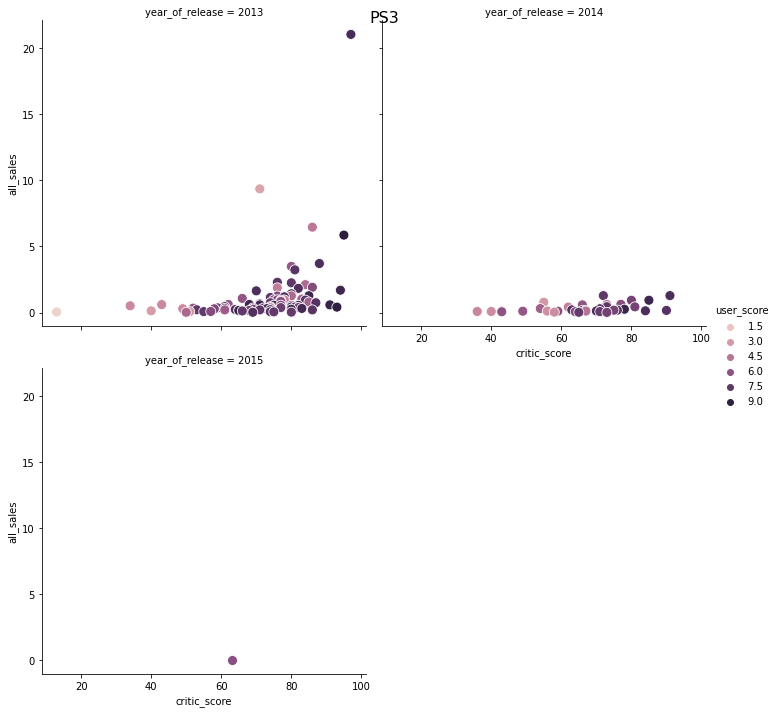

In [49]:
relplot_score_2(
    df_actual_all[df_actual_all['platform'] == 'PS3'], 
    'PS3')

In [50]:
corr_score_sales(df_actual_с[df_actual_с['platform'] == 'PS3'], df_actual_u[df_actual_u['platform'] == 'PS3'], 'PS3')

Корреляция между отзывами критиков и продажами для PS3: 0.3342853393371919
Корреляция между отзывами пользователей и продажами для PS3: 0.0023944027357566925


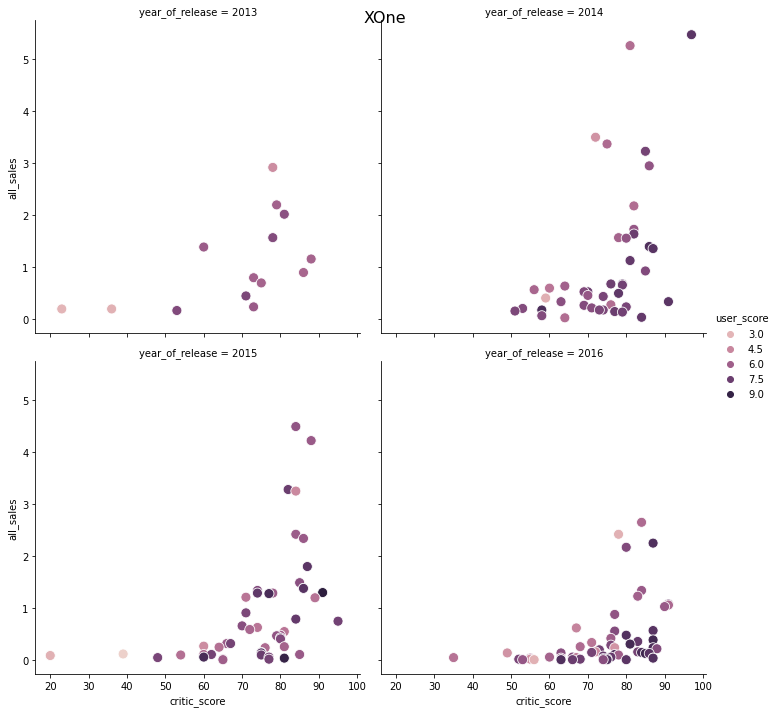

In [51]:
relplot_score_2(
    df_actual_all[df_actual_all['platform'] == 'XOne'], 
    'XOne')

In [52]:
corr_score_sales(df_actual_с[df_actual_с['platform'] == 'XOne'], df_actual_u[df_actual_u['platform'] == 'XOne'], 'XOne')

Корреляция между отзывами критиков и продажами для XOne: 0.4169983280084017
Корреляция между отзывами пользователей и продажами для XOne: -0.06892505328279414


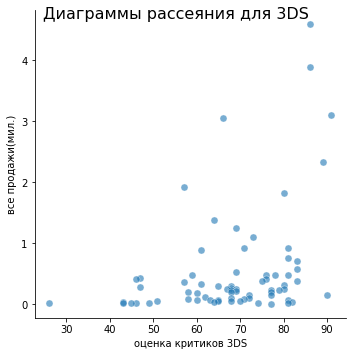

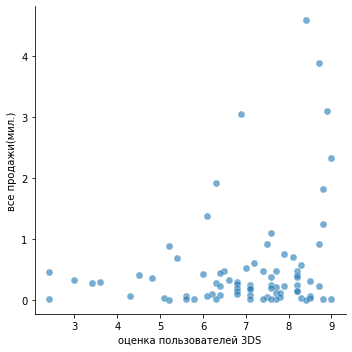

In [53]:
relplot_score(
        df_actual_с[df_actual_с['platform'] == '3DS'],
        df_actual_u[df_actual_u['platform'] == '3DS'],
        'оценка критиков 3DS', 
        'оценка пользователей 3DS', 
        'Диаграммы рассеяния для 3DS')

In [54]:
corr_score_sales(df_actual_с[df_actual_с['platform'] == '3DS'], df_actual_u[df_actual_u['platform'] == '3DS'], '3DS')

Корреляция между отзывами критиков и продажами для 3DS: 0.3570566142288103
Корреляция между отзывами пользователей и продажами для 3DS: 0.24150411773563016


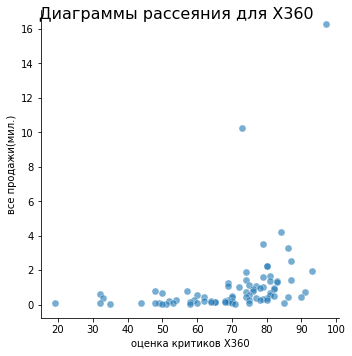

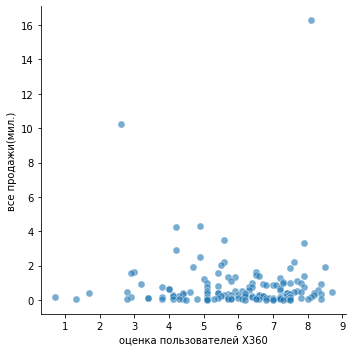

In [55]:
relplot_score(
        df_actual_с[df_actual_с['platform'] == 'X360'], 
        df_actual_u[df_actual_u['platform'] == 'X360'],
        'оценка критиков X360', 
        'оценка пользователей X360', 
        'Диаграммы рассеяния для X360')

In [56]:
corr_score_sales(df_actual_с[df_actual_с['platform'] == 'X360'], df_actual_u[df_actual_u['platform'] == 'X360'], 'X360')

Корреляция между отзывами критиков и продажами для X360: 0.3503445460228664
Корреляция между отзывами пользователей и продажами для X360: -0.011742185147181342


3DS


user_score    0.241504
all_sales     1.000000
Name: all_sales, dtype: float64

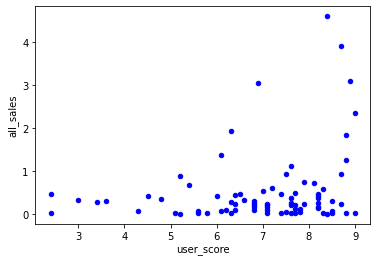

critic_score    0.357057
all_sales       1.000000
Name: all_sales, dtype: float64

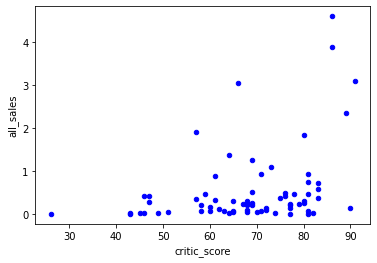

DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PC


user_score   -0.093842
all_sales     1.000000
Name: all_sales, dtype: float64

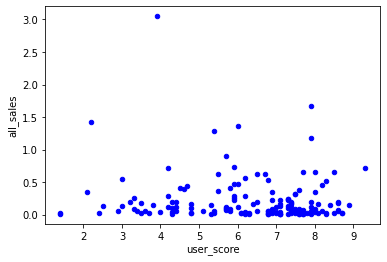

critic_score    0.19603
all_sales       1.00000
Name: all_sales, dtype: float64

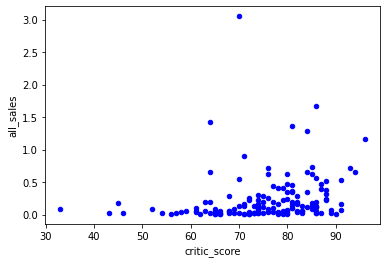

PS3


user_score    0.002394
all_sales     1.000000
Name: all_sales, dtype: float64

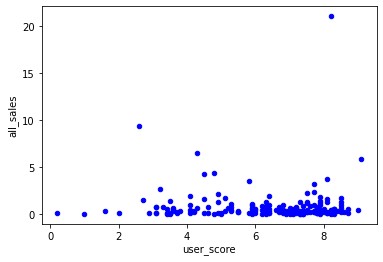

critic_score    0.334285
all_sales       1.000000
Name: all_sales, dtype: float64

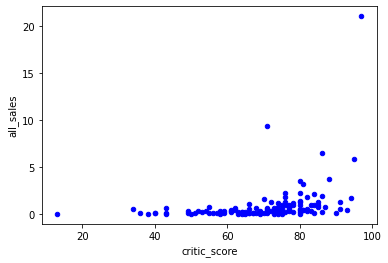

PS4


user_score   -0.031957
all_sales     1.000000
Name: all_sales, dtype: float64

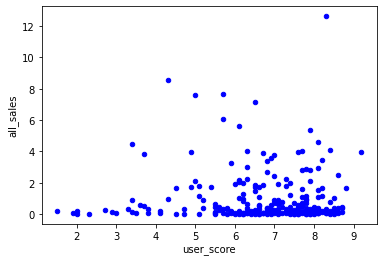

critic_score    0.406568
all_sales       1.000000
Name: all_sales, dtype: float64

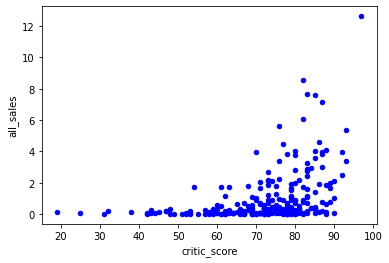

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score    0.000942
all_sales     1.000000
Name: all_sales, dtype: float64

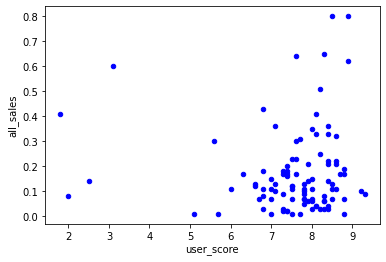

critic_score    0.254742
all_sales       1.000000
Name: all_sales, dtype: float64

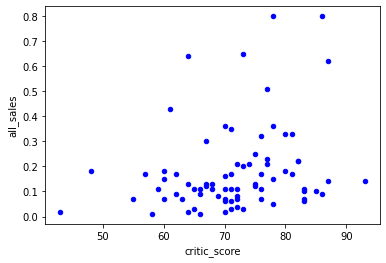

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score    0.41933
all_sales     1.00000
Name: all_sales, dtype: float64

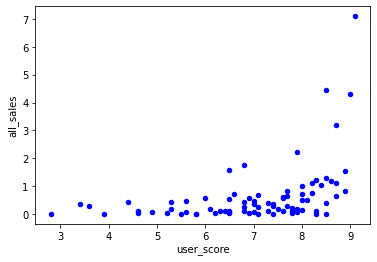

critic_score    0.376415
all_sales       1.000000
Name: all_sales, dtype: float64

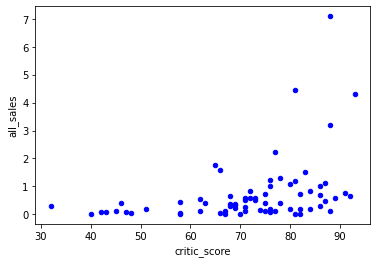

X360


user_score   -0.011742
all_sales     1.000000
Name: all_sales, dtype: float64

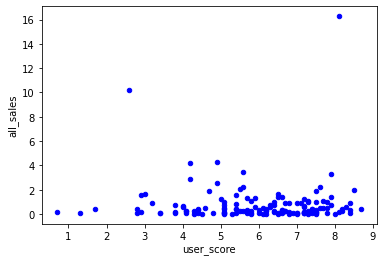

critic_score    0.350345
all_sales       1.000000
Name: all_sales, dtype: float64

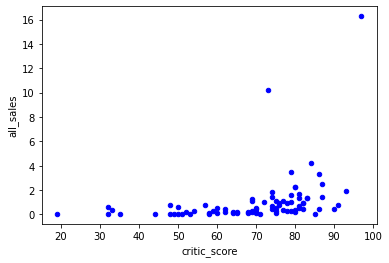

XOne


user_score   -0.068925
all_sales     1.000000
Name: all_sales, dtype: float64

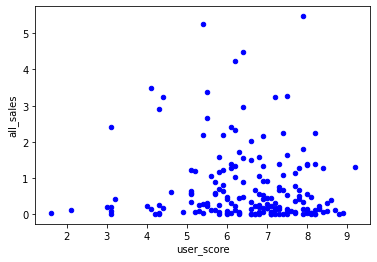

critic_score    0.416998
all_sales       1.000000
Name: all_sales, dtype: float64

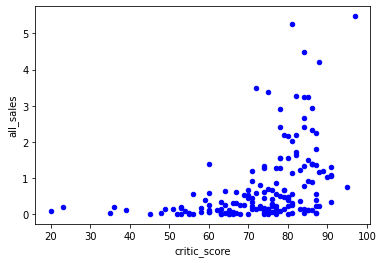

In [57]:
# Комментарий р
import matplotlib.pyplot as plt
df_sc, y = df_actual, 'all_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 10 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')


<font color='DarkGreen'>👌 Для оценки корреляции:</font>
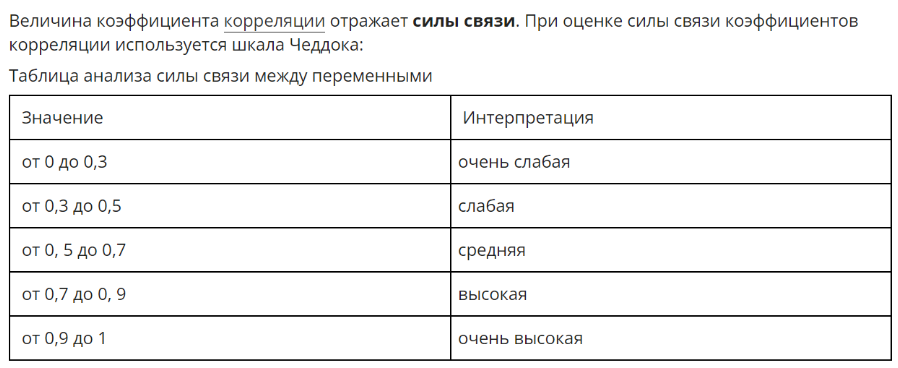

###  Общее распределение игр по жанрам. Самые прибыльные жанры.

<AxesSubplot:xlabel='genre'>

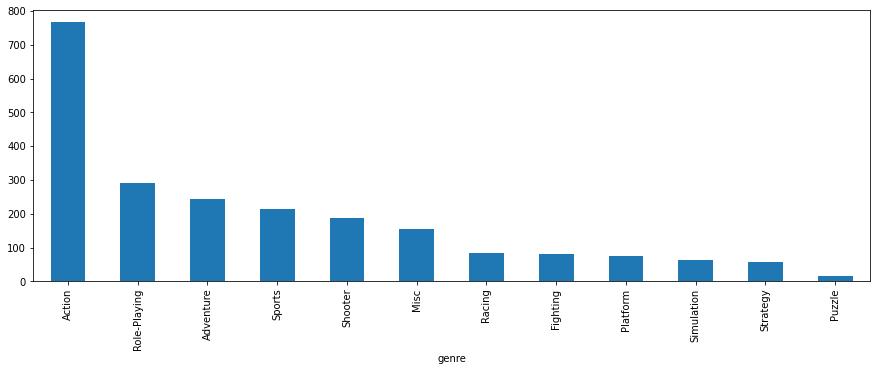

In [58]:
df_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot.bar(figsize=(15, 5))

<AxesSubplot:xlabel='genre'>

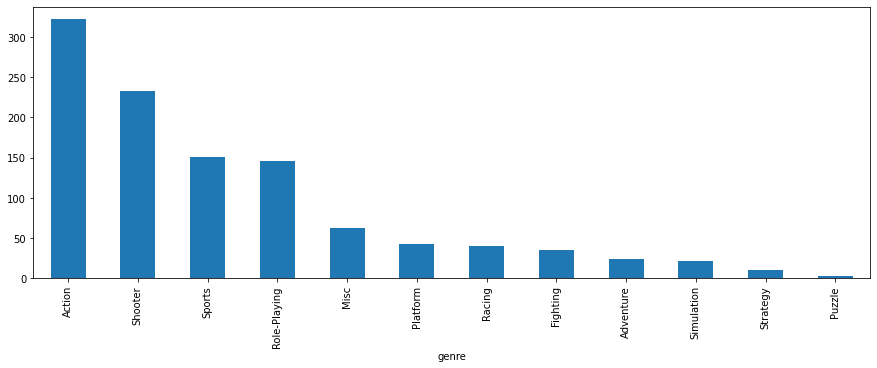

In [59]:
df_actual.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(15, 5))
#df_actual.pivot_table(index='genre', values='all_sales',  aggfunc='sum')

In [60]:
df_actual.groupby('genre')['all_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: all_sales, dtype: float64

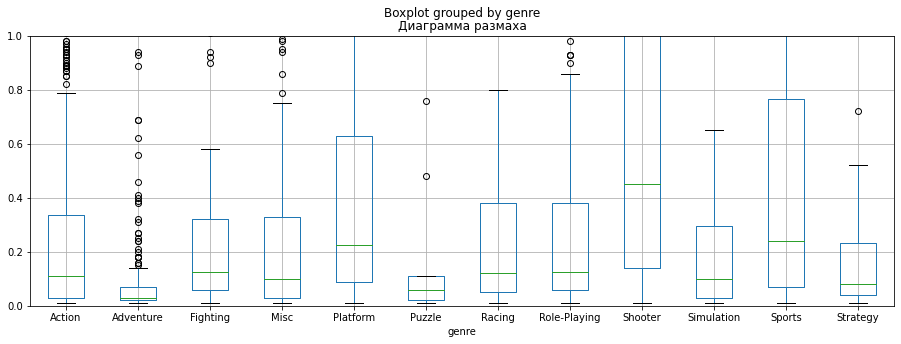

In [61]:
fig, ax = plt.subplots(figsize = (15,5))
ax = df_actual.boxplot(column='all_sales', by='genre',vert = True, ax =ax)
ax.set_title('Диаграмма размаха')
ax.set_ylim(0, 1);

Если сравнивать по количеству выпущенных игр и прибыли по жанрам, то видны различия. Самым прибыльным оказался жанр Action, по нему же и было выпущено больше всего игр - 766. На втором месте по прибыльности Shooter, но вот по количеству игр на 5. Третье место по прибыли Sports, 4 по выпущенным играм. Четвертое место по прибыли Role-Playing, но вот по количеству игр оно на 2. Получился топ4 игр к которых прибыль больше 100мил.: Action, Shooter, Sports, Role-Playing. 
Низкие продажи у Strategy и совсем низкие у Puzzle.  

Если сравнивать медианное значение праж по жанрам, но самое большое значение, а значит и большой спрос у Shooter и Sports. Т.е. это самые стабильные жанры, которые приносят доход не зависимо от платформы, и каких то игр которые выстрелили единично. 

## Составление портрета пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователя каждого региона 

<AxesSubplot:xlabel='platform'>

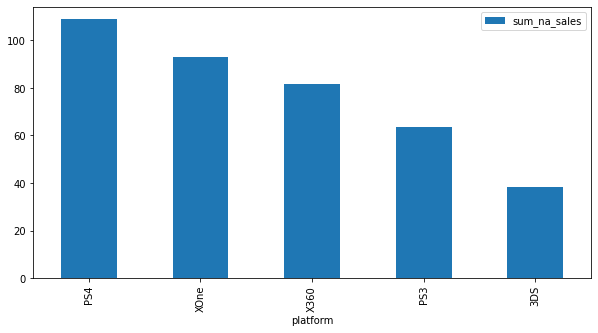

In [62]:
#Северная Америка
na_sales_top = df_actual.pivot_table(index='platform', values='na_sales',  aggfunc='sum')
na_sales_top.columns = [ 'sum_na_sales']
na_sales_top = na_sales_top.sort_values(by='sum_na_sales', ascending=False)
na_sales_top5 = na_sales_top[na_sales_top['sum_na_sales'] > 38]
na_sales_top5.plot.bar(figsize=(10, 5))

Топ5 для Северной Америки:PS4,  XOne, X360, PS3	, 3DS.

In [63]:
platform_all_sales = df_actual.groupby('platform')['all_sales'].sum()

In [64]:
#для для Северной Америки
share_na_sales = na_sales_top5.merge(platform_all_sales, on='platform', how='left')
share_na_sales['share_na'] =round(share_na_sales['sum_na_sales'] / share_na_sales['all_sales'] * 100)
share_na_sales

,sum_na_sales,all_sales,share_na
platform,,,
PS4,108.74,314.14,35.0
XOne,93.12,159.32,58.0
X360,81.66,136.80,60.0
PS3,63.50,181.43,35.0
3DS,38.20,143.25,27.0


В Северной Америке лидер продаж PS4, хотя от общего числа продаж для PS4 во всех странах это всего 35%.
На втором месте XOne, 58% от общего числа продаж для этой платформы, половина. На третьем месте X360, но зато доля продаж от общего количества продаж это 61%, что больше половины. 

<AxesSubplot:xlabel='platform'>

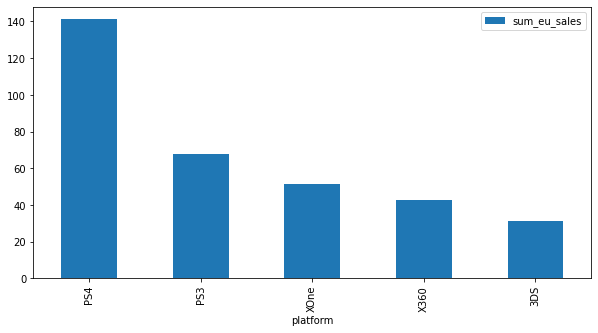

In [65]:
#Европа
eu_sales_top = df_actual.pivot_table(index='platform', values='eu_sales',  aggfunc='sum')
eu_sales_top.columns = [ 'sum_eu_sales']
eu_sales_top = eu_sales_top.sort_values(by='sum_eu_sales', ascending=False)
eu_sales_top5 = eu_sales_top[eu_sales_top['sum_eu_sales'] > 30]
eu_sales_top5.plot.bar(figsize=(10, 5))

Топ5 для Европы:PS4, PS3,  XOne, X360, 3DS.

In [66]:
#доля для Европы
share_eu_sales = eu_sales_top5.merge(platform_all_sales, on='platform', how='left')
share_eu_sales['share_eu'] =round(share_eu_sales['sum_eu_sales'] / share_eu_sales['all_sales'] * 100)
share_eu_sales

,sum_eu_sales,all_sales,share_eu
platform,,,
PS4,141.09,314.14,45.0
PS3,67.81,181.43,37.0
XOne,51.59,159.32,32.0
X360,42.52,136.80,31.0
3DS,30.96,143.25,22.0


Для Европы то5 продаж имеют низкую долю от общего количества продаж. Идут  по убывающей, на первом месте PS4 и его доля 45%, и дальше доля только ниже. 

<AxesSubplot:xlabel='platform'>

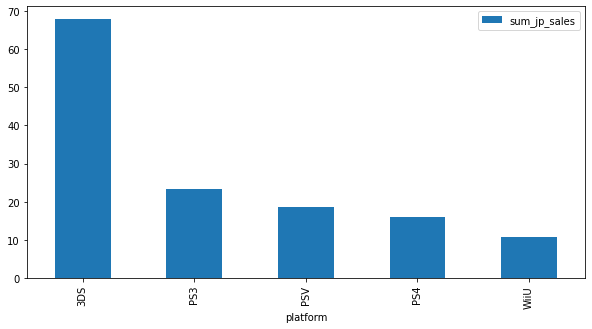

In [67]:
#Япония
jp_sales_top = df_actual.pivot_table(index='platform', values='jp_sales',  aggfunc='sum')
jp_sales_top.columns = ['sum_jp_sales']
jp_sales_top = jp_sales_top.sort_values(by='sum_jp_sales', ascending=False)
jp_sales_top5 = jp_sales_top[jp_sales_top['sum_jp_sales'] > 10]
jp_sales_top5.plot.bar(figsize=(10, 5))

Топ5 для европы : 3DS, PS3, PSV, PS4, WiiU.

In [68]:
#доля для Японии
share_jp_sales = jp_sales_top5.merge(platform_all_sales, on='platform', how='left')
share_jp_sales['share_jp'] = round(share_jp_sales['sum_jp_sales'] / share_jp_sales['all_sales'] * 100)
share_jp_sales

,sum_jp_sales,all_sales,share_jp
platform,,,
3DS,67.81,143.25,47.0
PS3,23.35,181.43,13.0
PSV,18.59,32.99,56.0
PS4,15.96,314.14,5.0
WiiU,10.88,64.63,17.0


В Японии самая большая доля продаж у PSV 56%, хотя в топе находится на 3 месте. На первом месте 3DS, доля продаж 47%, тоже почти поовина. 

### Самые популярные жанры (топ-5)

,sum_na_genre
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


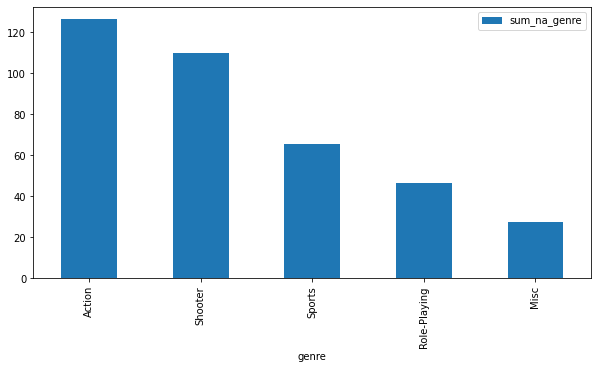

In [69]:
#Северная Америка
na_genre_top = df_actual.pivot_table(index='genre', values='na_sales',  aggfunc='sum')
na_genre_top.columns = [ 'sum_na_genre']
na_genre_top = na_genre_top.sort_values(by='sum_na_genre', ascending=False)
na_genre_top5 = na_genre_top[na_genre_top['sum_na_genre'] > 20]
na_genre_top5.plot.bar(figsize=(10, 5))
na_genre_top5

In [70]:
genre_all_sales = df_actual.groupby('genre')['all_sales'].sum()

In [71]:
#для для Северной Америки
share_na_genre = na_genre_top5.merge(genre_all_sales, on='genre', how='left')
share_na_genre['share_na'] =round(share_na_genre['sum_na_genre'] / share_na_genre['all_sales'] * 100)
share_na_genre

,sum_na_genre,all_sales,share_na
genre,,,
Action,126.05,321.87,39.0
Shooter,109.74,232.98,47.0
Sports,65.27,150.65,43.0
Role-Playing,46.40,145.89,32.0
Misc,27.49,62.82,44.0


Топ 5 для Северной Америки: Action, Shooter, Sports, Role-Playing, Misc.

,sum_jp_genre
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


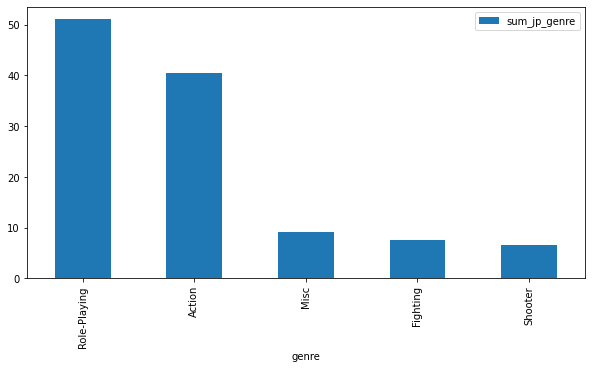

In [72]:
#Япония
jp_genre_top = df_actual.pivot_table(index='genre', values='jp_sales',  aggfunc='sum')
jp_genre_top.columns = ['sum_jp_genre']
jp_genre_top = jp_genre_top.sort_values(by='sum_jp_genre', ascending=False)
jp_genre_top5 = jp_genre_top[jp_genre_top['sum_jp_genre'] > 6]
jp_genre_top5.plot.bar(figsize=(10, 5))
jp_genre_top5

In [73]:
#доля для Японии
share_jp_genre = jp_genre_top5.merge(genre_all_sales, on='genre', how='left')
share_jp_genre['share_jp'] = round(share_jp_genre['sum_jp_genre'] / share_jp_genre['all_sales'] * 100)
share_jp_genre

,sum_jp_genre,all_sales,share_jp
genre,,,
Role-Playing,51.04,145.89,35.0
Action,40.49,321.87,13.0
Misc,9.20,62.82,15.0
Fighting,7.65,35.31,22.0
Shooter,6.61,232.98,3.0


Топ5 для Японии: Role-Playing, Action, Misc, Fighting, Shooter.

,sum_eu_genre
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


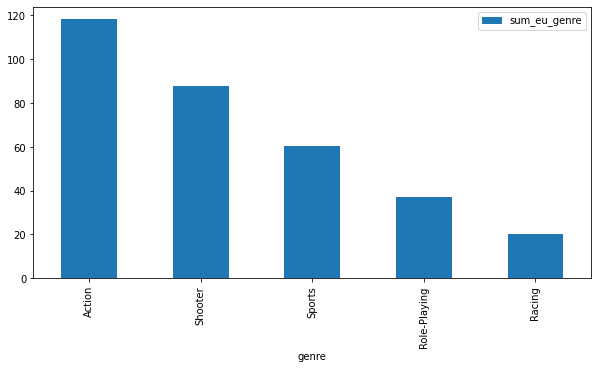

In [74]:
#Европа
eu_genre_top = df_actual.pivot_table(index='genre', values='eu_sales',  aggfunc='sum')
eu_genre_top.columns = [ 'sum_eu_genre']
eu_genre_top = eu_genre_top.sort_values(by='sum_eu_genre', ascending=False)
eu_genre_top5 = eu_genre_top[eu_genre_top['sum_eu_genre'] > 20.1]
eu_genre_top5.plot.bar(figsize=(10, 5))
eu_genre_top5


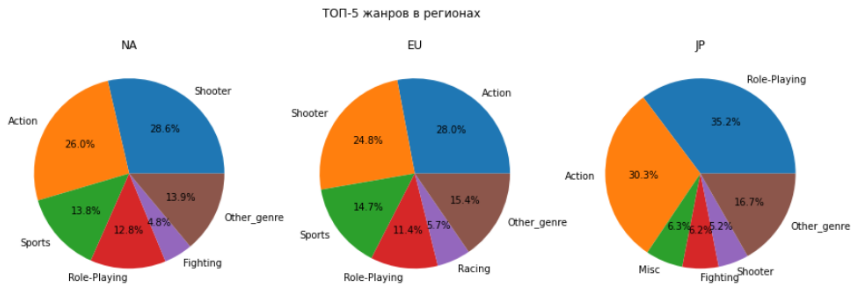

In [75]:
#доля для Европы
share_eu_genre = eu_genre_top5.merge(genre_all_sales, on='genre', how='left')
share_eu_genre['share_eu'] =round(share_eu_genre['sum_eu_genre'] / share_eu_genre['all_sales'] * 100)
share_eu_genre

,sum_eu_genre,all_sales,share_eu
genre,,,
Action,118.13,321.87,37.0
Shooter,87.86,232.98,38.0
Sports,60.52,150.65,40.0
Role-Playing,36.97,145.89,25.0
Racing,20.19,39.89,51.0


Топ5 для Европы: Action, Shooter, Sports, Role-Playing, Racing. 

Список топ5. 

Топ 5 для Северной Америки: Action, Shooter, Sports, Role-Playing, Misc.

Топ5 для Японии: Role-Playing, Action, Misc, Fighting, Shooter.

Топ5 для Европы: Action, Shooter, Sports, Role-Playing, Racing. 

Если вспомнить распределение жанров в общем по всем продажам (3.8).

Топ 5 по суме продаж: Action, Shooter, Sports , Role-Playing ,Misc.  

Видно что почти совпадают жанры с Европой, если смотреть по долям то она и Северная Америка делают самые большие продажи игр.

### Влияние рейтинга ESRB на продажи в отдельных регионах

,sum_na_rating
rating,
M,165.21
No,89.42
E,79.05
E10+,54.24
T,49.79


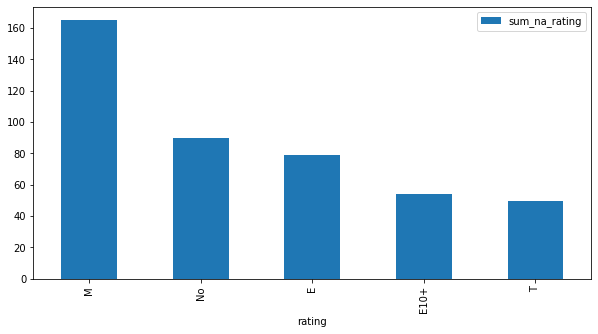

In [76]:
#Северная Америка
na_rating_top = df_actual.pivot_table(index='rating', values='na_sales',  aggfunc='sum')
na_rating_top.columns = [ 'sum_na_rating']
na_rating_top = na_rating_top.sort_values(by='sum_na_rating', ascending=False)
na_rating_top.plot.bar(figsize=(10, 5))
na_rating_top

,sum_jp_rating
rating,
No,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


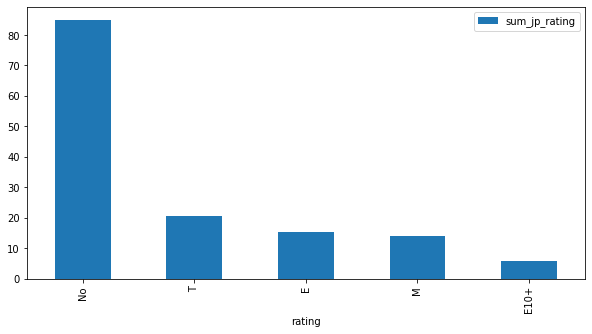

In [77]:
#Япония
jp_rating_top = df_actual.pivot_table(index='rating', values='jp_sales',  aggfunc='sum')
jp_rating_top.columns = ['sum_jp_rating']
jp_rating_top = jp_rating_top.sort_values(by='sum_jp_rating', ascending=False)
jp_rating_top.plot.bar(figsize=(10, 5))
jp_rating_top

,sum_eu_rating
rating,
M,145.32
E,83.36
No,78.91
E10+,42.69
T,41.95


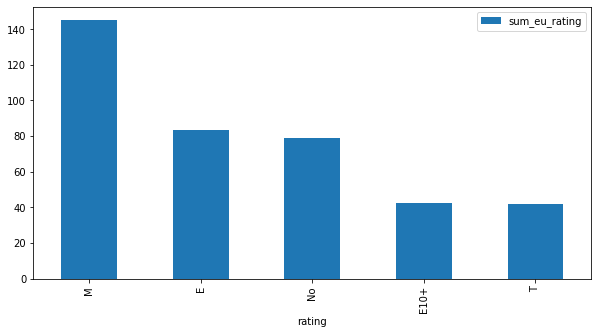

In [78]:
#Европа
eu_rating_top = df_actual.pivot_table(index='rating', values='eu_sales',  aggfunc='sum')
eu_rating_top.columns = [ 'sum_eu_rating']
eu_rating_top = eu_rating_top.sort_values(by='sum_eu_rating', ascending=False)
eu_rating_top.plot.bar(figsize=(10, 5))
eu_rating_top

Влияние рейтинга ESRB точно присутствует. В Европе самый большой показатель М - 17+возраст. В Японии с самым высоким показателелем категория No, т.е. это пропуски, игры категория каторых не известна, поэтому сказать точно мы не можем, на какой возраст лучше всего ориентироваться в Японии. На втором месте в Японии возраст Т - подростки. В Северной Америке на первом месте М - 17+. Но так же с большим показателем категория No. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Пользовательский рейтинг платформы "Xbox One" = пользовательский рейтинг платформы "PC"`
H_a: Пользовательский рейтинг платформы "Xbox One" ≠ пользовательский рейтинг платформы "PC"`
alpha = 0.05
```

In [79]:
df_actual_u[df_actual_u['platform'] == 'XOne']['user_score'].mean()

6.521428571428572

In [80]:
df_actual_u[df_actual_u['platform'] == 'PC']['user_score'].mean()

6.2696774193548395

In [81]:
from scipy import stats as st

In [82]:
alpha = 0.05

user_score_XOne = df_actual_u.loc[df_actual_u['platform'] == 'XOne']['user_score']
user_score_PC = df_actual_u.loc[df_actual_u['platform'] == 'PC']['user_score']

results = st.ttest_ind(
    user_score_XOne,
    user_score_PC, 
    equal_var=False)

print(results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14759594013430463
Отвергаем нулевую гипотезу


Пользовательский рейтинг платформы "Xbox One" не равен пользовательскому рейтингу платформы "PC"`

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы возьмем:
```
H_0: Пользовательский рейтинг жанров Action и Sports одинавковые`
H_a: Пользовательский рейтинг жанров Action и Sports разные`
alpha = 0.05
```

In [83]:
df_actual_u[df_actual_u['genre'] == 'Action']['user_score'].mean()

6.837532133676092

In [84]:
df_actual_u[df_actual_u['genre'] == 'Sports']['user_score'].mean()

5.238124999999999

In [85]:
from scipy import stats as st

In [86]:
alpha = 0.05

user_score_Action = df_actual_u.loc[df_actual_u['genre'] == 'Action']['user_score']
user_score_Sports = df_actual_u.loc[df_actual_u['genre'] == 'Sports']['user_score']

results = st.ttest_ind(
    user_score_Action,
    user_score_Sports, 
    equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Пользовательский рейтинг жанров Action не равен пользовательскому рейтингу жанров Sports`, т.е. различны.

Нулевая гипотеза формаровалась как равенство двух средних значений, Альтрнативная гипотеза - гипотеза обратная нулевой в нашем случае. Во всех гиотезах использовала двусторонний критерий Стьюдента для сравнения двух средних. Нулевая гипотеза, эта гипотеза которую мы отвергаем или принимаем. 

## Общий вывод

В ходе данного иследования изначально были изенены типы данных, удалены и исправлены на медианное значение пропуски в таблице. По проведенному анализу за последние 4 года можно выделить самые прибольные платформы они же потенциаьно прибольные на 2017г - PS4, XOne. 

сСмые популярные игры имеют самую высокую оценку пользователей и критиков. Для всех странн самыми популярными жанрами оказались Shooter и Sports. Т.е. это самые стабильные жанры. В них можно вкладывать деньги в дальнейшее производства игр.  

По платформам самой популярной по сранам оказалась конечно же PS4 и чуть ниже PS3. XOne не меннее популярна в странах Севеная америка и Европа, в японии ее нет. По рейтенгу ESRB самыми популярными в продажах оказались игры с рейтингом М, Е.

Обращать внимание стоит на пользовательский рейтинг. Гипотеза о равенстве средний по оценке пользователей для Xbox One и PC не подтвердилась. Гипотеза о пользовательский рейтинг жанров Action и Sports подтвердилась, они различаются.  